# DataFrames

In [4]:
import pandas as pd

In [5]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = [101, 102, 103, 104, 105, 106, 107]

In [6]:
df = pd.DataFrame(data=data, index=row_labels)
df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


# Iterating Over a pandas DataFrame
As you learned earlier, a DataFrame’s row and column labels can be retrieved as sequences with .index and .columns. You can use this feature to iterate over labels and get or set data values. However, pandas provides several more convenient methods for iteration:

.items() to iterate over columns
.iterrows() to iterate over rows
.itertuples() to iterate over rows and get named tuples
With .items() and .iteritems(), you iterate over the columns of a pandas DataFrame. Each iteration yields a tuple with the name of the column and the column data as a Series object:

In [12]:
for col_label, col in df.items():
    print(col_label, col, sep='\n', end='\n\n')


name
101    Xavier
102       Ann
103      Jana
104        Yi
105     Robin
106      Amal
107      Nori
Name: name, dtype: object

city
101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

age
101    41
102    28
103    33
104    34
105    38
106    31
107    37
Name: age, dtype: int64

py-score
101    88.0
102    79.0
103    81.0
104    80.0
105    68.0
106    61.0
107    84.0
Name: py-score, dtype: float64



That’s how you use .items() and .iteritems().

With .iterrows(), you iterate over the rows of a pandas DataFrame. Each iteration yields a tuple with the name of the row and the row data as a Series object:

In [13]:
for row_label, row in df.iterrows():
    print(row_label, row, sep='\n', end='\n\n')

101
name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: 101, dtype: object

102
name            Ann
city        Toronto
age              28
py-score       79.0
Name: 102, dtype: object

103
name          Jana
city        Prague
age             33
py-score      81.0
Name: 103, dtype: object

104
name              Yi
city        Shanghai
age               34
py-score        80.0
Name: 104, dtype: object

105
name             Robin
city        Manchester
age                 38
py-score          68.0
Name: 105, dtype: object

106
name         Amal
city        Cairo
age            31
py-score     61.0
Name: 106, dtype: object

107
name         Nori
city        Osaka
age            37
py-score     84.0
Name: 107, dtype: object



That’s how you use .iterrows().

Similarly, .itertuples() iterates over the rows and in each iteration yields a named tuple with (optionally) the index and data:

In [ ]:
for row in df.loc[:, ['name', 'city', 'total']].itertuples():
    print(row)

You can specify the name of the named tuple with the parameter name, which is set to 'pandas' by default. You can also specify whether to include row labels with index, which is set to True by default.



# Working With Time Series
pandas excels at handling time series. Although this functionality is partly based on NumPy datetimes and timedeltas, pandas provides much more flexibility.

## Creating DataFrames With Time-Series Labels
In this section, you’ll create a pandas DataFrame using the hourly temperature data from a single day.

You can start by creating a list (or tuple, NumPy array, or other data type) with the data values, which will be hourly temperatures given in degrees Celsius:

In [14]:
temp_c = [ 8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

Now you have the variable temp_c, which refers to the list of temperature values.

The next step is to create a sequence of dates and times. pandas provides a very convenient function, date_range(), for this purpose:

In [15]:
dt = pd.date_range(start='2019-10-27 00:00:00.0', periods=24,
                   freq='H')
dt

<ipython-input-15-0d81e8cc6129>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dt = pd.date_range(start='2019-10-27 00:00:00.0', periods=24,


DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00',
               '2019-10-27 06:00:00', '2019-10-27 07:00:00',
               '2019-10-27 08:00:00', '2019-10-27 09:00:00',
               '2019-10-27 10:00:00', '2019-10-27 11:00:00',
               '2019-10-27 12:00:00', '2019-10-27 13:00:00',
               '2019-10-27 14:00:00', '2019-10-27 15:00:00',
               '2019-10-27 16:00:00', '2019-10-27 17:00:00',
               '2019-10-27 18:00:00', '2019-10-27 19:00:00',
               '2019-10-27 20:00:00', '2019-10-27 21:00:00',
               '2019-10-27 22:00:00', '2019-10-27 23:00:00'],
              dtype='datetime64[ns]', freq='h')

date_range() accepts the arguments that you use to specify the start or end of the range, number of periods, frequency, time zone, and more.

Note: Although other options are available, pandas mostly uses the ISO 8601 date and time format by default.
Now that you have the temperature values and the corresponding dates and times, you can create the DataFrame. In many cases, it’s convenient to use date-time values as the row labels:

In [16]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


## Indexing and Slicing
Once you have a pandas DataFrame with time-series data, you can conveniently apply slicing to get just a part of the information:

In [17]:
temp['2019-10-27 05':'2019-10-27 14']

,temp_c
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8
2019-10-27 10:00:00,15.3
2019-10-27 11:00:00,19.1
2019-10-27 12:00:00,21.2
2019-10-27 13:00:00,22.1
2019-10-27 14:00:00,22.4


This example shows how to extract the temperatures between 05:00 and 14:00 (5 a.m. and 2 p.m.). Although you’ve provided strings, pandas knows that your row labels are date-time values and interprets the strings as dates and times.

## Resampling and Rolling
You’ve just seen how to combine date-time row labels and use slicing to get the information you need from the time-series data. This is just the beginning. It gets better!

If you want to split a day into four six-hour intervals and get the mean temperature for each interval, then you’re just one statement away from doing so. pandas provides the method .resample(), which you can combine with other methods such as .mean():

In [18]:
temp.resample(rule='6h').mean()

,temp_c
2019-10-27 00:00:00,6.616667
2019-10-27 06:00:00,11.016667
2019-10-27 12:00:00,21.283333
2019-10-27 18:00:00,12.016667


You now have a new pandas DataFrame with four rows. Each row corresponds to a single six-hour interval. For example, the value 6.616667 is the mean of the first six temperatures from the DataFrame temp, whereas 12.016667 is the mean of the last six temperatures.

Instead of .mean(), you can apply .min() or .max() to get the minimum and maximum temperatures for each interval. You can also use .sum() to get the sums of data values, although this information probably isn’t useful when you’re working with temperatures.

You might also need to do some rolling-window analysis. This involves calculating a statistic for a specified number of adjacent rows, which make up your window of data. You can “roll” the window by selecting a different set of adjacent rows to perform your calculations on.

Your first window starts with the first row in your DataFrame and includes as many adjacent rows as you specify. You then move your window down one row, dropping the first row and adding the row that comes immediately after the last row, and calculate the same statistic again. You repeat this process until you reach the last row of the DataFrame.

pandas provides the method .rolling() for this purpose:

In [20]:
temp.rolling(window=3).mean()

,temp_c
2019-10-27 00:00:00,NaN
2019-10-27 01:00:00,NaN
2019-10-27 02:00:00,7.300000
2019-10-27 03:00:00,6.766667
2019-10-27 04:00:00,6.400000
2019-10-27 05:00:00,5.933333
2019-10-27 06:00:00,5.400000
2019-10-27 07:00:00,5.066667
2019-10-27 08:00:00,6.300000
2019-10-27 09:00:00,8.966667


Now you have a DataFrame with mean temperatures calculated for several three-hour windows. The parameter window specifies the size of the moving time window.

In the example above, the third value (7.3) is the mean temperature for the first three hours (00:00:00, 01:00:00, and 02:00:00). The fourth value is the mean temperature for the hours 02:00:00, 03:00:00, and 04:00:00. The last value is the mean temperature for the last three hours, 21:00:00, 22:00:00, and 23:00:00. The first two values are missing because there isn’t enough data to calculate them.

# Plotting With pandas DataFrames
pandas allows you to visualize data or create plots based on DataFrames. It uses Matplotlib in the background, so exploiting pandas’ plotting capabilities is very similar to working with Matplotlib.

If you want to display the plots, then you first need to import matplotlib.pyplot:

In [21]:
import matplotlib.pyplot as plt

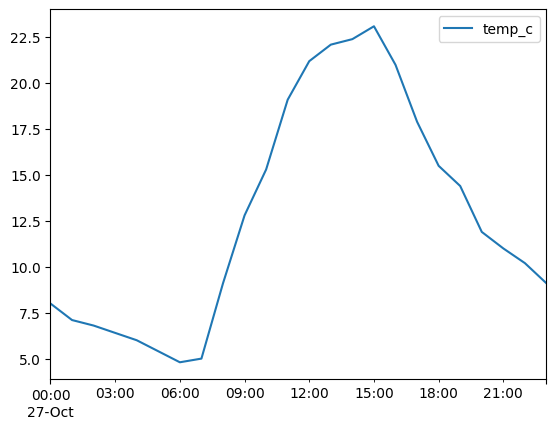

In [22]:
temp.plot()

plt.show()

You can also apply .plot.line() and get the same result. Both .plot() and .plot.line() have many optional parameters that you can use to specify the look of your plot. Some of them are passed directly to the underlying Matplotlib methods.

You can save your figure by chaining the methods .get_figure() and .savefig():

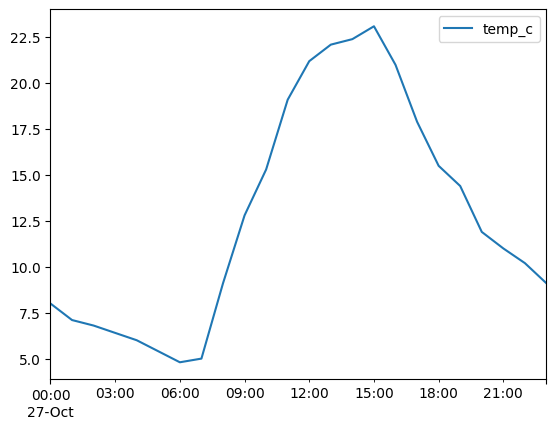

In [23]:
temp.plot().get_figure().savefig('temperatures.png')

# Constructing Lists in Python
First things first. If you want to use a list to store or collect some data in your code, then you need to create a list object. You’ll find several ways to create lists in Python. That’s one of the features that make lists so versatile and popular.

For example, you can create lists using one of the following tools:

List literals
The list() constructor
A list comprehension
In the following sections, you’ll learn how to use the three tools listed above to create new lists in your code. You’ll start off with list literals.

## Creating Lists Through Literals
List literals are probably the most popular way to create a list object in Python. These literals are fairly straightforward. They consist of a pair of square brackets enclosing a comma-separated series of objects.

Here’s the general syntax of a list literal:

[item_0, item_1, ..., item_n]
This syntax creates a list of n items by listing the items in an enclosing pair of square brackets. Note that you don’t have to declare the items’ type or the list’s size beforehand. Remember that lists have a variable size and can store heterogeneous objects.

Here are a few examples of how to use the literal syntax to create new lists:

In [24]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fruits = ["apple", "banana", "orange", "kiwi", "grape"]
cities = [
    "New York",
    "Los Angeles",
    "Chicago",
    "Houston",
    "Philadelphia"
]

matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

inventory = [
    {"product": "phone", "price": 1000, "quantity": 10},
    {"product": "laptop", "price": 1500, "quantity": 5},
    {"product": "tablet", "price": 500, "quantity": 20}
]

functions = [print, len, range, type, enumerate]

empty = []

In these examples, you use the list literal syntax to create lists containing numbers, strings, other lists, dictionaries, and even function objects. As you already know, lists can store any type of object. They can also be empty, like the final list in the above code snippet.

Empty lists are useful in many situations. For example, maybe you want to create a list of objects resulting from computations that run in a loop. The loop will allow you to populate the empty list one element at a time.

Using a list literal is arguably the most common way to create lists. You’ll find these literals in many Python examples and codebases. They come in handy when you have a series of elements with closely related meanings, and you want to pack them into a single data structure.

Note that naming lists as plural nouns is a common practice that improves readability. However, there are situations where you can use collective nouns as well.

For example, you can have a list called people. In this case, every item will be a person. Another example would be a list that represents a table in a database. You can call the list table, and each item will be a row. You’ll find more examples like these in your walk-through of using lists.

## Using the list() Constructor
Another tool that allows you to create list objects is the class constructor, list(). You can call this constructor with any iterable object, including other lists, tuples, sets, dictionaries and their components, strings, and many others. You can also call it without any arguments, in which case you’ll get an empty list back.

Here’s the general syntax:

list([iterable])
To create a list, you need to call list() as you’d call any class constructor or function. Note that the square brackets around iterable mean that the argument is optional, so the brackets aren’t part of the syntax. Here are a few examples of how to use the constructor:

In [25]:
list((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))


list({"circle", "square", "triangle", "rectangle", "pentagon"})


list({"name": "John", "age": 30, "city": "New York"}.items())


list("Pythonista")


list()

[]

In these examples, you create different lists using the list() constructor, which accepts any type of iterable object, including tuples, dictionaries, strings, and many more. It even accepts sets, in which case you need to remember that sets are unordered data structures, so you won’t be able to predict the final order of items in the resulting list.

Calling list() without an argument creates and returns a new empty list. This way of creating empty lists is less common than using an empty pair of square brackets. However, in some situations, it can make your code more explicit by clearly communicating your intent: creating an empty list.

The list() constructor is especially useful when you need to create a list out of an iterator object. For example, say that you have a generator function that yields numbers from the Fibonacci sequence on demand, and you need to store the first ten numbers in a list.

In this case, you can use list() as in the code below:

In [26]:
def fibonacci_generator(stop):
    current_fib, next_fib = 0, 1
    for _ in range(0, stop):
        fib_number = current_fib
        current_fib, next_fib = next_fib, current_fib + next_fib
        yield fib_number


fibonacci_generator(10)


list(fibonacci_generator(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Calling fibonacci_generator() directly returns a generator iterator object that allows you to iterate over the numbers in the Fibonacci sequence up to the index of your choice. However, you don’t need an iterator in your code. You need a list. A quick way to get that list is to wrap the iterator in a call to list(), as you did in the final example.

This technique comes in handy when you’re working with functions that return iterators, and you want to construct a list object out of the items that the iterator yields. The list() constructor will consume the iterator, build your list, and return it back to you.

Note: You can also use the literal syntax and the iterable unpacking operator (*) as an alternative to the list() constructor.

Here’s how:

>>> [*fibonacci_generator(10)]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
In this example, the iterable unpacking operator consumes the iterator, and the square brackets build the final list of numbers. However, this technique is less readable and explicit than using list().
As a side note, you’ll often find that built-in and third-party functions return iterators. Functions like reversed(), enumerate(), map(), and filter() are good examples of this practice. It’s less common to find functions that directly return list objects, but the built-in sorted() function is one example. It takes an iterable as an argument and returns a list of sorted items.

## Building Lists With List Comprehensions
List comprehensions are one of the most distinctive features of Python. They’re quite popular in the Python community, so you’ll likely find them all around. List comprehensions allow you to quickly create and transform lists using a syntax that mimics a for loop but in a single line of code.

The core syntax of list comprehensions looks something like this:

[expression(item) for item in iterable]
Every list comprehension needs at least three components:

expression() is a Python expression that returns a concrete value, and most of the time, that value depends on item. Note that it doesn’t have to be a function.
item is the current object from iterable.
iterable can be any Python iterable object, such as a list, tuple, set, string, or generator.
The for construct iterates over the items in iterable, while expression(item) provides the corresponding list item that results from running the comprehension.

To illustrate how list comprehensions allow you to create new lists out of existing iterables, say that you want to construct a list with the square values of the first ten integer numbers. In this case, you can write the following comprehension:

In [27]:
[number ** 2 for number in range(1, 11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In this example, you use range() to get the first ten integer numbers. The comprehension iterates over them while computing the square and building the new list. This example is just a quick sample of what you can do with a list comprehension.

Note: To dive deeper into list comprehensions and how to use them, check out When to Use a List Comprehension in Python.
In general, you’ll use a list comprehension when you need to create a list of transformed values out of an existing iterable. Comprehensions are a great tool that you need to master as a Python developer. They’re optimized for performance and are quick to write.

# Creating Copies of a List
Creating copies of an existing list is a common need in Python code. Having a copy ensures that when you change a given list, that change doesn’t affect the original data or the data in other copies.

Note: In Python, an object’s identity is a unique identifier that distinguishes it from other objects. You can use the built-in id() function to get the identity of any Python object. In Python’s CPython implementation, an object’s identity coincides with the memory address where the object is stored.
In Python, you’ll have two kinds of mechanisms to create copies of an existing list. You can create either:

A shallow copy
A deep copy
Both types of copies have specific characteristics that will directly impact their behavior. In the following sections, you’ll learn how to create shallow and deep copies of existing lists in Python. First, you’ll take a glance at aliases, a related concept that can cause some confusion and lead to issues and bugs.

## Aliases of a List
In Python, you can create aliases of variables using the assignment operator (=). Assignments don’t create copies of objects in Python. Instead, they create bindings between the variable and the object involved in the assignment. Therefore, when you have several aliases of a given list, changes in an alias will affect the rest of the aliases.

To illustrate how you can create aliases and how they work, consider the following example:

In [28]:
countries = ["United States", "Canada", "Poland", "Germany", "Austria"]

nations = countries
id(countries) == id(nations)

True

In [29]:
countries[0] = "United States of America"

nations

['United States of America', 'Canada', 'Poland', 'Germany', 'Austria']

In this code snippet, the first highlighted line creates nations as an alias of countries. Note how both variables point to the same object, which you know because the object’s identity is the same. In the second highlighted line, you update the object at index 0 in countries. This change reflects in the nations alias.

Assignment statements like the one in the first highlighted line above don’t create copies of the right-hand object. They just create aliases or variables that point to the same underlying object.

In general, aliases can come in handy in situations where you need to avoid name collisions in your code or when you need to adapt the names to specific naming patterns.

To illustrate, say that you have an app that uses your list of countries as countries in one part of the code. The app requires the same list in another part of the code, but there’s already a variable called countries with other content.

If you want both pieces of code to work on the same list, then you can use nations as an alias for countries. A handy way to do this would be to use the as keyword for creating the alias through an implicit assignment, for example, when you import the list from another module.

## Shallow Copies of a List
A shallow copy of an existing list is a new list containing references to the objects stored in the original list. In other words, when you create a shallow copy of a list, Python constructs a new list with a new identity. Then, it inserts references to the objects in the original list into the new list.

There are at least three different ways to create shallow copies of an existing list. You can use:

The slicing operator, [:]
The .copy() method
The copy() function from the copy module
These three tools demonstrate equivalent behavior. So, to kick things off, you’ll start exploring the slicing operator:

In [30]:
countries = ["United States", "Canada", "Poland", "Germany", "Austria"]

nations = countries[:]
nations

['United States', 'Canada', 'Poland', 'Germany', 'Austria']

In [31]:
id(countries) == id(nations)

False

The highlighted line creates nations as a shallow copy of countries by using the slicing operator with one colon only. This operation takes a slice from the beginning to the end of countries. In this case, nations and countries have different identities. They’re completely independent list objects.

However, the elements in nations are aliases of the elements in countries:

In [32]:
id(nations[0]) == id(countries[0])

True

As you can see, items under the same index in both nations and countries share the same object identity. This means that you don’t have copies of the items. You’re really sharing them. This behavior allows you to save some memory when working with lists and their copies.

Now, how would this impact the behavior of both lists? If you changed an item in nations, would the change reflect in countries? The code below will help you answer these questions:

In [33]:
countries[0] = "United States of America"
countries


['United States of America', 'Canada', 'Poland', 'Germany', 'Austria']

In [34]:
nations

['United States', 'Canada', 'Poland', 'Germany', 'Austria']

In [35]:
id(countries[0]) == id(nations[0])

False

On the first line of this piece of code, you update the item at index 0 in countries. This change doesn’t affect the item at index 0 in nations. Now the first items in the lists are completely different objects with their own identities. The rest of the items, however, continue to share the same identity. So, they’re the same object in each case.

Because making copies of a list is such a common operation, the list class has a dedicated method for it. The method is called .copy(), and it returns a shallow copy of the target list:

In [36]:
countries = ["United States", "Canada", "Poland", "Germany", "Austria"]

nations = countries.copy()
nations

['United States', 'Canada', 'Poland', 'Germany', 'Austria']

In [37]:
id(countries) == id(nations)

False

In [38]:
id(countries[0]) == id(nations[0])

True

In [39]:
countries[0] = "United States of America"
countries

['United States of America', 'Canada', 'Poland', 'Germany', 'Austria']

In [40]:
nations

['United States', 'Canada', 'Poland', 'Germany', 'Austria']

## Deep Copies of a List
Sometimes you may need to build a complete copy of an existing list. In other words, you want a copy that creates a new list object and also creates new copies of the contained elements. In these situations, you’ll have to construct what’s known as a deep copy.

When you create a deep copy of a list, Python constructs a new list object and then inserts copies of the objects from the original list recursively.

To create a deep copy of an existing list, you can use the deepcopy() function from the copy module. Here’s an example of how this function works:

In [41]:
from copy import deepcopy

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix_copy = deepcopy(matrix)

id(matrix) == id(matrix_copy)

False

In [42]:
id(matrix[0]) == id(matrix_copy[0])

False

In this example, you create a deep copy of your matrix list. Note how both the lists and their sibling items have different identities.

Why would you need to create a deep copy of matrix, anyway? For example, if you only create a shallow copy of matrix, then you can face some issues when trying to mutate the nested lists:

In [43]:
from copy import copy

matrix_copy = copy(matrix)
matrix_copy[0][0] = 100
matrix_copy[0][1] = 200
matrix_copy[0][2] = 300
matrix_copy

[[100, 200, 300], [4, 5, 6], [7, 8, 9]]

In [44]:
matrix

[[100, 200, 300], [4, 5, 6], [7, 8, 9]]

In this example, you create a shallow copy of matrix. If you change items in a nested list within matrix_copy, then those changes affect the original data in matrix. The way to avoid this behavior is to use a deep copy:

In [45]:
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

matrix_copy = deepcopy(matrix)
matrix_copy[0][0] = 100
matrix_copy[0][1] = 200
matrix_copy[0][2] = 300
matrix_copy

[[100, 200, 300], [4, 5, 6], [7, 8, 9]]

In [46]:
matrix

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Updating Items in Lists: Index Assignments
Python lists are mutable data types. This means that you can change their elements without changing the identity of the underlying list. These kinds of changes are commonly known as in-place mutations. They allow you to update the value of one or more items in an existing list.

Note: To dive deeper into what mutable and immutable data types are and how they work in Python, check out Python’s Mutable vs Immutable Types: What’s the Difference?
To change the value of a given element in a list, you can use the following syntax:

list_object[index] = new_value
The indexing operator gives you access to the target item through its index, while the assignment operator allows you to change its current value.

Here’s how this assignment works:

In [47]:
numbers = [1, 2, 3, 4]

numbers[0] = "one"
numbers

numbers[1] = "two"
numbers


numbers[-1] = "four"
numbers

numbers[-2] = "three"
numbers

['one', 'two', 'three', 'four']

In this example, you’ve replaced all the numeric values in numbers with strings. To do that, you’ve used their indices and the assignment operator in what you can call index assignments. Note that negative indices also work.

What if you know an item’s value but don’t know its index in the list? How can you update the item’s value? In this case, you can use the .index() method as in the code below:

In [48]:
fruits = ["apple", "banana", "orange", "kiwi", "grape"]

fruits[fruits.index("kiwi")] = "mango"
fruits

['apple', 'banana', 'orange', 'mango', 'grape']

The .index() method takes a specific item as an argument and returns the index of the first occurrence of that item in the underlying list. You can take advantage of this behavior when you know the item that you want to update but not its index. However, note that if the target item isn’t present in the list, then you’ll get a ValueError.

You can also update the value of multiple list items in one go. To do that, you can access the items with the slicing operator and then use the assignment operator and an iterable of new values. This combination of operators can be called slice assignment for short.

Here’s the general syntax:

list_object[start:stop:step] = iterable
In this syntax, the values from iterable replace the portion of list_object defined by the slicing operator. If iterable has the same number of elements as the target slice, then Python updates the elements one by one without altering the length of list_object.

To understand these behaviors, consider the following examples:

In [49]:
numbers = [1, 2, 3, 4, 5, 6, 7]

numbers[1:4] = [22, 33, 44]
numbers

[1, 22, 33, 44, 5, 6, 7]

# Growing and Shrinking Lists Dynamically
In Python lists, mutability goes beyond allowing you to modify the items in place. Because lists are mutable, you can change their length on the fly by adding or removing elements. So, lists are also variable-length containers, as you already learned.

Adding new items to a list or removing unneeded ones are everyday tasks. That’s why Python provides different efficient ways to perform these actions. Using the right tool for the job is an essential skill.

In the following sections, you’ll explore the different tools that Python offers to grow and shrink a list dynamically.

## Appending a Single Item at Once: .append()
The .append() method is probably the most common tool that you’ll use to add items to an existing list. As its name suggests, this method allows you to append items to a list. The method takes one item at a time and adds it to the right end of the target list.

Here’s an example of how .append() works:

In [50]:
pets = ["cat", "dog"]

pets.append("parrot")
pets


pets.append("gold fish")
pets


pets.append("python")
pets

['cat', 'dog', 'parrot', 'gold fish', 'python']

**An important fact to keep in mind when using .append() is that this method adds only a single item at a time. That item could be of any data type, including another list:**

In [51]:
pets.append(["hamster", "turtle"])
pets

['cat', 'dog', 'parrot', 'gold fish', 'python', ['hamster', 'turtle']]

Note how the last item in pets is a list of two pets rather than two new independent pets. This behavior may be a source of subtle errors. To avoid problems, you must remember that .append() takes and adds a single item each time.

If you need to add several items from an iterable at the end of an existing list, then you can use the .extend() method, which you’ll expore in the following section.

## Extending a List With Multiple Items at Once: .extend()
When you’re working with lists, you may face the need to add multiple items to the right end of a list at once. Because this is such a common requirement, Python’s list has a dedicated method for that task.

The method is called .extend(). It takes an iterable of objects and appends them as individual items to the end of the target list:

In [52]:
fruits = ["apple", "pear", "peach"]

fruits.extend(["orange", "mango", "banana"])
fruits

['apple', 'pear', 'peach', 'orange', 'mango', 'banana']

The .extend() method unpacks the items in the input iterable and adds them one by one to the right end of your target list. Now fruits has three more items on its end.

You should note that .extend() can take any iterable as an argument. So, you can use tuples, strings, dictionaries and their components, iterators, and even sets. However, remember that if you use a set as an argument to extend(), then you won’t know the final order of items beforehand.

## Inserting an Item at a Given Position: .insert()
The .insert() method is another tool that you can use to add items to an existing list. This method is a bit different from .append() and .extend(). Instead of adding items at the right end of the list, .insert() allows you to decide where you want to put your item. That said, .insert() takes two arguments:

index: the index at which you want to insert the item
item: the item that you need to insert into the list
When you insert an item at a given index, Python moves all the following items one position to the right in order to make space for the new item, which will take the place of the old item at the target index:

In [53]:
letters = ["A", "B", "F", "G"]

letters.insert(2, "C")
letters

['A', 'B', 'C', 'F', 'G']

## Deleting Items From a List
Python also allows you to remove one or more items from an existing list. Again, deleting items from lists is such a common operation that the list class already has methods to help you with that. You’ll have the following methods:

Method	Description
.remove(item)	Removes the first occurrence of item from the list. It raises a ValueError if there’s no such item.
.pop([index])	Removes the item at index and returns it back to the caller. If you don’t provide a target index, then .pop() removes and returns the last item in the list. Note that the square brackets around index mean that the argument is optional. The brackets aren’t part of the syntax.
.clear()	Removes all items from the list.
The .remove() method comes in handy when you want to remove an item from a list, but you don’t know the item’s index. If you have several items with the same value, then you can remove all of them by calling .remove() as many times as the item occurs:

In [54]:
sample = [12, 11, 10, 42, 14, 12, 42]

sample.remove(42)
sample

[12, 11, 10, 14, 12, 42]

In [55]:
sample.remove(42)
sample

[12, 11, 10, 14, 12]

In [56]:
sample.remove(42)

ValueError: list.remove(x): x not in list

The first call to .remove() deletes the first instance of the number 42. The second call removes the remaining instance of 42. If you call .remove() with an item that’s not in the target list, then you get a ValueError.

The .pop() method allows you to remove and return a specific item using its index. If you call the method with no index, then it removes and returns the last item in the underlying list:

In [58]:
to_visit = [
    "https://realpython.com",
    "https://python.org",
    "https://stackoverflow.com",
]

visited = to_visit.pop()
visited

'https://stackoverflow.com'

In [59]:
to_visit

['https://realpython.com', 'https://python.org']

In [60]:
visited = to_visit.pop(0)
visited

'https://realpython.com'

In [61]:
to_visit

['https://python.org']

In these examples, the first call to .pop() removes and returns the last site in your list of sites to visit. The second call removes and returns the first site, which is the site at index 0.

Finally, you use .pop() with -1 as an argument to emphasize that you can also use negative indices. This call removes and returns the last item. At the end of the process, your list of sites to visit is empty, pointing out that you’ve done all your planned visits.

Removing all the items from a list in one go can be another frequent task. In this case, Python also has you covered because list has a method called .clear(), which does exactly that. Consider the following example:

In [62]:
cache = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
cache.clear()
cache

[]

There’s still one more Python tool that you can use to remove one or more items from an existing list. Yes, that’s the del statement. You can combine del with an indexing or slicing operation to remove an item or multiple items, respectively:

In [63]:
colors = [
    "red",
    "orange",
    "yellow",
    "green",
    "blue",
    "indigo",
    "violet"
]

del colors[1]
colors

['red', 'yellow', 'green', 'blue', 'indigo', 'violet']

## Considering Performance While Growing Lists
When you create a list, Python allocates enough space to store the provided items. It also allocates extra space to host future items. When you use the extra space by adding new items to that list with .append(), .extend(), or .insert(), Python automatically creates room for additional new items.

This process is known as resizing, and while it ensures that the list can accept new items, it requires extra CPU time and additional memory. Why? Well, to grow an existing list, Python creates a new one with room for your current data and the extra items. Then it moves the current items to the new list and adds the new item or items.

Consider the following code to explore how Python grows a list dynamically:

In [64]:
from sys import getsizeof

numbers = []
for value in range(100):
    print(getsizeof(numbers))
    numbers.append(value)

56
88
88
88
88
120
120
120
120
184
184
184
184
184
184
184
184
248
248
248
248
248
248
248
248
312
312
312
312
312
312
312
312
376
376
376
376
376
376
376
376
472
472
472
472
472
472
472
472
472
472
472
472
568
568
568
568
568
568
568
568
568
568
568
568
664
664
664
664
664
664
664
664
664
664
664
664
792
792
792
792
792
792
792
792
792
792
792
792
792
792
792
792
920
920
920
920
920
920
920


In this code snippet, you first import getsizeof() from the sys module. This function allows you to get the size of an object in bytes. Then you define numbers as an empty list.

Inside the for loop, you get and print your list object’s size in bytes. The first iteration shows that the size of your empty list is 56 bytes, which is the baseline size of every list in Python.

Next, the .append() method adds a new value to your list. Note how the size of numbers grows to 88 bytes. That’s the baseline size plus 32 additional bytes (56 + 4 × 8 = 88), which represent four 8-byte pointers or slots for future items. It means that Python went ahead and allocated space for four items when you added the first element.

As the loop goes, the size of numbers grows to 120 bytes, which is 88 + 4 × 8 = 120. This step allocates space for four more items. That’s why you get 120 four times on your screen.

If you follow the loop’s output, then you’ll notice that the next steps add room for eight extra items, then for twelve, then for sixteen, and so on. Every time Python resizes the list, it has to move all the items to the new space, which takes considerable time.

In practice, if you’re working with small lists, then the overall impact of this internal behavior is negligible. However, in performance-critical situations or when your lists are large, you may want to use more efficient data types, such as collections.deque, for example.

Check out the time complexity Wiki page for a detailed summary of how time-efficient list operations are. For example, the .append() method has a time complexity of O(1), which means that appending an item to a list takes constant time. However, when Python has to grow the list to make room for the new item, this performance will be a bit poorer.

Being aware of the time complexity of common list operations will significantly improve your ability to choose the right tool for the job, depending on your specific needs.

# Reversing and Sorting Lists
Reversing and specially sorting lists of values are commonplace tasks in programming. In Python, you’ll have the built-in reversed() and sorted() functions to perform these tasks. When you’re working with lists, then you also have the .reverse() and .sort() methods, which reverse and sort the target list in place.

In the following sections, you’ll learn how to reverse and sort lists using the tools that Python provides for these tasks.

## Reversing a List: reversed() and .reverse()
The built-in reversed() function takes a sequence as an argument and returns an iterator that yields the values of that sequence in reverse order:

In [70]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

digits = reversed(digits)
type(digits)

list_reverseiterator

In [71]:
list(digits)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [68]:
list(reversed(digits))


digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

When you call reversed() with a list as an argument, you get a reverse iterator object. This iterator yields values from the input list in reverse order. In this example, you use the list() constructor to consume the iterator and get the reversed data as a list.

The reversed() function doesn’t modify the input object. You’ll typically use reversed() in loops as a way to iterate over your data in reverse order. If you need to keep a reference to your data, then you can use list() and assign its return value to a new variable, which will be completely independent of your original sequence.

It’s important to note that reversed() retrieves items from the input sequence lazily. This means that if something changes in the input sequence during the reversing process, then those changes will reflect in the final result:

In [72]:
numbers = [1, 2, 3]

reversed_numbers = reversed(numbers)
next(reversed_numbers)

3

In [73]:
numbers[1] = 222
next(reversed_numbers)


222

In [74]:
next(reversed_numbers)

1

In this example, you use the built-in next() function to consume the iterator value by value. The first call to next() returns the last item from numbers. Then you update the value of the second item from 2 to 222. When you call next() again, you get 222 instead of 2. This is because reversed() doesn’t create a copy of the input iterable. Instead, it works with a reference to it.

The reversed() function is great when you want to iterate over a list in reverse order without altering the original list. What if you have a list, and for some reason, you need to reverse its content persistently? In that case, you can use the .reverse() method:

In [75]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

digits.reverse()
digits

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## Sorting a List: sorted() and .sort()
When you need to sort a list of values without altering the original list, you can use the built-in sorted() function. This function takes an iterable of values and returns a list of sorted values:

In [76]:
numbers = [2, 9, 5, 1, 6]

sorted(numbers)

[1, 2, 5, 6, 9]

In [77]:
numbers

[2, 9, 5, 1, 6]

When you pass a list to sorted(), you get a list of sorted values as a result. The function doesn’t alter the original data in your list.

Note: It’s important to note that sorted() returns a list rather than an iterator. This behavior differs from reversed(), which returns an iterator instead of a list.
As you can see in the above example, Python sorts numbers according to their specific values. When it comes to sorting strings, things can be a bit confusing. Consider the following example:

In [78]:
words = ["Hello,", "World!", "I", "am", "a", "Pythonista!"]

sorted(words)

['Hello,', 'I', 'Pythonista!', 'World!', 'a', 'am']

What? The sorted list isn’t in alphabetical order. Why? Python sorts strings character by character using each character’s Unicode code point. Because uppercase letters come before lowercase letters in Python’s default character set, UTF-8, you end up with "Hello" in the first position and "am" in the last.

You can use the built-in ord() function to get the Unicode code point of a character in Python:

In [79]:
ord("H")

72

In [81]:
ord("h")

104

As you can confirm in this code snippet, the uppercase "H" comes before the lowercase "a" in the Unicode table. That’s why you get "Hello" before "am" in the above example.

By default, the sorted() function sorts the items of a list in ascending order. If you need to sort the items in descending order, then you can use the reverse keyword-only argument. This argument defaults to False. If you set it to True, then you get the data in descending order:

In [82]:
numbers = [2, 9, 5, 1, 6]

sorted(numbers, reverse=True)

[9, 6, 5, 2, 1]

Note: As you already learned, lists can store objects of different types. However, heterogeneous lists often don’t allow you to sort their content:


```
>>> numbers = [2, "9", 5, "1", 6]

>>> sorted(numbers)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: '<' not supported between instances of 'str' and 'int'
In practice, you won’t find heterogeneous lists in many use cases. Sequences of heterogeneous objects are like a database record with a few known and immutable fields. In those cases, using a tuple is a better way to go.
```



# Exploring Other Features of Lists
Python’s list has an impressive set of features, making it a versatile, flexible, and powerful data structure. So far, you’ve learned about most of these features. You’ve learned to create lists, add and remove items from your lists, traverse existing lists in a loop or comprehension, and much more.

In the following sections, you’ll learn about some additional features that make lists even more powerful. You’ll learn how to find items in a list, determine the minimum and maximum values, and get the list’s length. You’ll also explore the details of how Python compares lists to each other.

# Finding Items in a List
Python has a few tools that allow you to search for values in an existing list. For example, if you only need to quickly determine whether a value is present in a list, but you don’t need to grab the value, then you can use the in or not in operator, which will run a membership test on your list.

Note: To learn more about the in and not in operators and how to perform membership tests, check out Python’s “in” and “not in” Operators: Check for Membership. These operators can be pretty useful when you need to check if a Python string contains a substring.
As its name suggests, a membership test is a Boolean test that allows you to find out whether an object is a member of a collection of values. The general syntax for membership tests on list objects looks something like this:

```
item in list_object

item not in list_object
```


The first expression allows you to determine if item is in list_object. It returns True if it finds item in list_object or False otherwise. The second expression works in the opposite way, allowing you to check if item is not in list_object. In this case, you get True if item doesn’t appear in list_object.

Here’s how membership tests work in practice:

In [83]:
usernames = ["john", "jane", "bob", "david", "eve"]

"linda" in usernames


False

In [84]:
"linda" not in usernames

True

In this example, you have a list of users and want to determine whether some specific users are registered in your system.

The first test uses in to check whether the user linda is registered. You get False because that user isn’t registered. The second test uses the not in operator, which returns True as a confirmation that linda isn’t one of your users.

The .index() method is another tool that you can use to find a given value in an existing list. This method traverses a list looking for a specified value. If the value is in the list, then the method returns its index. Otherwise, it raises a ValueError exception:

In [85]:
usernames = ["john", "jane", "bob", "david", "eve"]

usernames.index("eve")

4

In [86]:
usernames.index("linda")

ValueError: 'linda' is not in list

In the first call to .index(), you get the index where you can find the user named "eve". You can use this index later in your code to access the actual object as needed. In the second call, because the user "linda" isn’t in the list, you get a ValueError with an explanatory message.

Note that if your search’s target value appears several times in the list, then .index() will return the index of the first occurrence:

In [87]:
sample = [12, 11, 10, 50, 14, 12, 50]

sample.index(12)

0

In [88]:
sample.index(50)

3

The .index() method returns as soon as it finds the input value in the underlying list. So, if the value occurs many times, then .index() always returns the index of the first occurrence.

Lists provide yet another method that you can use for searching purposes. The method is called .count(), and it allows you to check how many times a given value is present in a list:

In [89]:
sample = [12, 11, 10, 50, 14, 12, 50]

sample.count(12)

2

In [90]:
sample.count(11)

1

The .count() method takes an item as an argument and returns the number of times the input item appears in the underlying list. If the item isn’t in the list, then you get 0.

Searching for a specific value in a Python list isn’t a cheap operation. The time complexity of .index(), .count(), and membership tests on lists is O(n). Such linear complexity may be okay if you don’t need to perform many lookups. However, it can negatively impact performance if you need to run many of these operations.

## Getting the Length, Maximum, and Minimum of a List
While working with Python lists, you’ll face the need to obtain descriptive information about a given list. For example, you may want to know the number of items in the list, which is known as the list’s length. You may also want to determine the greatest and lowest values in the list. In all these cases, Python has you covered.

To determine the length of a list, you’ll use the built-in len() function. In the following example, you use this function as an intermediate step to calculate the average grade of a student:

In [91]:
grades = [80, 97, 86, 100, 98, 82]
n = len(grades)
sum(grades) / n

90.5

Another frequent task that you’ll perform on lists, especially on lists of numeric values, is to find the minimum and maximum values. To do this, you can take advantage of the built-in min() and max() functions:

In [92]:
min([3, 5, 9, 1, -5])

-5

In [93]:
max([3, 5, 9, 1, -5])

9

## Common Gotchas of Python Lists
If you’re new to Python and are starting with lists, then you’ll want to be on the lookout for a few gotchas that can cause subtle issues in your code. Up to this point, you’ve learned what you need in order to understand most of these gotchas, so here’s a summary of the most common ones:

**Confusing aliases of a list with copies**: This can cause issues because changes to one alias affect others. Take a look at the Aliases of a List section for practical examples of this issue.
**Forgetting that most list methods mutate the list in place and return None rather than a new list**: This commonly leads to issues when you assign the return value of a list method to a variable, thinking that you have a new list, but you really get None. Check out the Reversing and Sorting Lists section for practical examples of this gotcha.
**Confusing .append() with .extend()**: This can cause issues because .append() adds a single item to the end of the list, while the .extend() method unpacks and adds multiple items. Have a look at the Growing and Shrinking Lists Dynamically section for details on how these methods work.
**Using an empty list as a default argument value in function definitions**: This can lead to unexpected behaviors because default argument values get defined when Python first parses the function.